In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
hout = np.load('hout_mnist_train.npy', allow_pickle=True)
hout = [np.array(hout[i], dtype=np.float32) for i in range(10)]

In [17]:
# 01极端值处理
houtr = [np.where(hout[i] > 1-1e-7, 1-1e-7, hout[i]) for i in range(10)]
houtr = [np.where(houtr[i] < 1e-7, 1e-7, houtr[i]) for i in range(10)]
sum(houtr[0][:,0]>=1-1e-6), sum(houtr[0][:,12]<=1e-6)

(3900, 5115)

In [18]:
hlog = np.array([np.sum(np.log(houtr[i]/(1-houtr[i])), axis=0) for i in range(10)])
ha = np.arctan(hlog /np.pi) /np.pi + 0.5

In [19]:
# 用Beta分布来拟合数据，Beta(a,1-a)的极大似然估计
from math import lgamma
def lbeta(a):
    return lgamma(a) + lgamma(1-a)

def lbetapdf(x, a, T=0.999):
    a = 0.5 + (a-0.5) * 1
    x = 0.5 + (x-0.5) * T
    return (a-1)*np.log(x) - a*np.log(1-x) - lbeta(a)

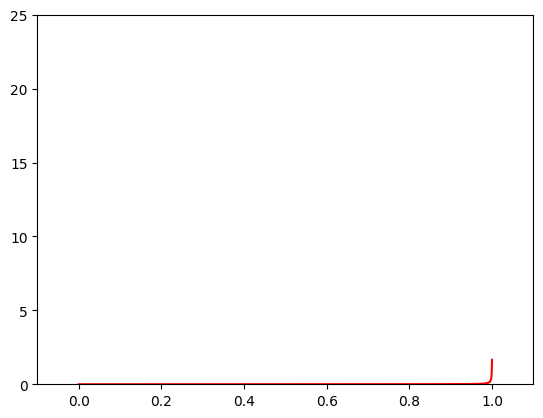

In [20]:
x = np.linspace(0.0001, 0.9999, 10000)
y = np.exp(lbetapdf(x, 0.999))
plt.plot(x, y, color='r', linestyle='-')
plt.xlim(-0.1, 1.1)
plt.ylim(0, 25)
plt.show()

In [21]:
houtt = np.load('hout_mnist_test.npy', allow_pickle=True)
houtt = [np.array(houtt[i], dtype=np.float32) for i in range(10)]

In [22]:
def uncertainty(houtt, y):
    llike = np.array([lbetapdf(houtt[:, i], ha[y][i]) for i in range(ha.shape[1])])
    return llike.sum(axis=0)

In [23]:
y_ture = np.concatenate([houtt[i][:,-1] for i in range(10)])
pro = np.concatenate([uncertainty(houtt[i], i) for i in range(10)])

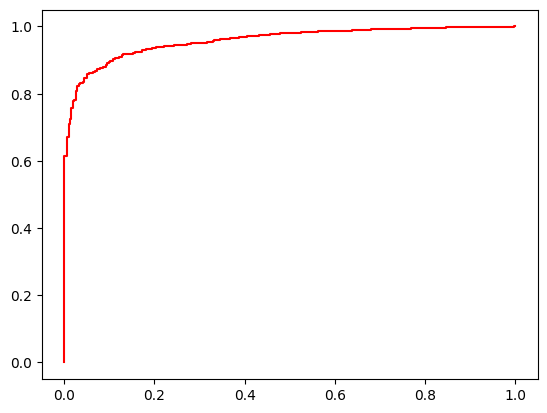

(95.80353894798569, -155.09064)

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_ture, pro)
roc_auc = roc_auc_score(y_ture, pro)
plt.plot(fpr, tpr, color='r', linestyle='-')
plt.show()
roc_auc*100, thresholds[np.argmax(tpr-fpr)]